**Data Project - Stock Market Analysis**

In this notebook, we will discover and explore data from the stock market, particularly some technology stocks (Barclay, Deutsche Bank, Bank of America, and Credit Suiess).I will use **yfinance** to get stock information, and visualize different aspects of it using Seaborn and Matplotlib. Firstly I will look at a few ways of analyzing the risk of a stock, based on its previous performance history hen we will also be predicting future stock prices through a **Long Short Term Memory (LSTM)** method!

We'll be answering the following questions along the way:

1.) What was the change in price of the stock over time?

2.) What was the daily return of the stock on average?

3.) What was the moving average of the various stocks?

4.) What was the correlation between different stocks'?

5.) How much value do we put at risk by investing in a particular stock?

6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of **Barclay**  using **LSTM**)

**Getting the Data**

```
The first step is to get the data and load it to memory.
We will get our stock data from the Yahoo Finance website.
Yahoo Finance is a rich resource of financial market data and tools to find compelling investments.
To get the data from Yahoo Finance, we will be using yfinance library which offers a threaded and
Pythonic way to download market data from Yahoo.
```



**Download the Data set**

In [ ]:
#install import library
!pip install -q yfinance

In [ ]:
#import essential library for analysis
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()


In [ ]:
# For time stamps
from datetime import datetime

#The bank stock we will use for this analysis
bank_list = ['BCS','DB','BAC','CS']

# BCS--> BARCLAY, DB-->Deutsche Bank , BAC-->Bank of America, CS--> Credit Suiess

In [ ]:
#Set up End and Start times for data grab
bank_list = ['BCS','DB','BAC','CS']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [ ]:
#Download the dataset and make a data frame
for stock in bank_list:
  globals()[stock] = yf.download(stock,start,end)
#Using globals() is a sloppy way of setting the DataFrame names, but it's simple.

company_list = [BCS,DB,BAC,CS]
company_name = ['BARCLAY','Deutsche Bank','BANK OF AMERICA','CREDIT SUIESS']

for company, com_name in zip(company_list,company_name):
  company['company_name'] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-05-26,0.8600,0.88250,0.8583,0.8731,0.8731,16111809,CREDIT SUIESS
2023-05-30,0.8692,0.87180,0.8440,0.8471,0.8471,23371506,CREDIT SUIESS
2023-05-31,0.8327,0.84000,0.8153,0.8211,0.8211,24923738,CREDIT SUIESS
2023-06-01,0.8430,0.87060,0.8350,0.8561,0.8561,66985438,CREDIT SUIESS
2023-06-02,0.8740,0.90200,0.8721,0.8950,0.8950,38202156,CREDIT SUIESS
2023-06-05,0.8900,0.90080,0.8810,0.8857,0.8857,61567176,CREDIT SUIESS
2023-06-06,0.8700,0.89189,0.8520,0.8846,0.8846,43515849,CREDIT SUIESS
2023-06-07,0.8757,0.88755,0.8629,0.8728,0.8728,71173827,CREDIT SUIESS
2023-06-08,0.8792,0.88320,0.8710,0.8771,0.8771,59087603,CREDIT SUIESS


So, we have downloaded the data set which have the columns name as:

Date,  Open,
 High,  Low,  Close,  Adj Close,
  Volume, Company name

**Descriptive Statistics about the Data**

**.describe()** generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.

Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided.

__1.) What was the change in price of the stock over time?__

In [ ]:
#Summary Stats of Barclay stock prices
BCS.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,7.783904,7.861713,7.716813,7.791873,7.654112,7.646970e+06
std,0.665575,0.656394,0.675917,0.672124,0.656679,3.963705e+06
min,5.910000,6.120000,5.890000,6.050000,5.873421,2.055000e+06
25%,7.525000,7.580000,7.435000,7.520000,7.383036,5.013600e+06
50%,7.790000,7.850000,7.720000,7.800000,7.667478,6.751800e+06
75%,8.105000,8.200000,8.040000,8.090000,8.025000,9.182350e+06
max,9.420000,9.440000,9.270000,9.350000,9.077106,3.025740e+07


We have only 251 records in one year because weekends are not included in the data.

In [ ]:
#Information about the barclay(BCS) data
BCS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-07-26 to 2023-07-25
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


**Closing Price**

* The closing price is the price at which
the stock is traded during the regular day.

* A stock closing price is the standard benchmark used by investors to track its performance over time.

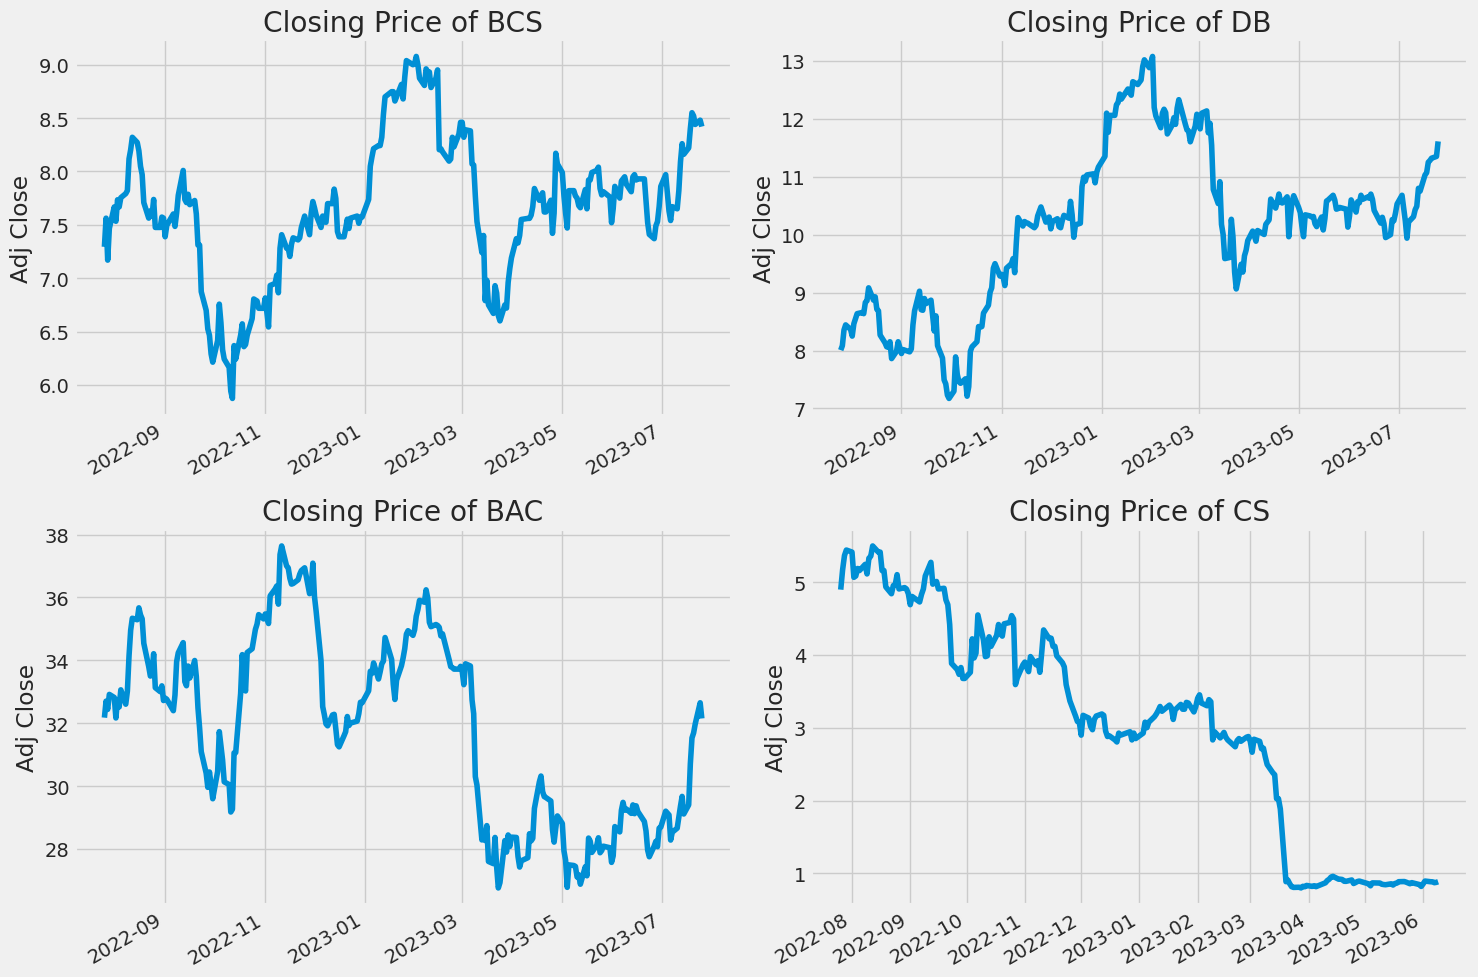

In [ ]:
#Let's see a historical view of the closing price
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list,1):
  plt.subplot(2,2,i)
  company['Adj Close'].plot()
  plt.ylabel('Adj Close')
  plt.xlabel(None)
  plt.title(f"Closing Price of {bank_list[i - 1]}")

plt.tight_layout()

**Volume of Sales**

* Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day.

* For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close.

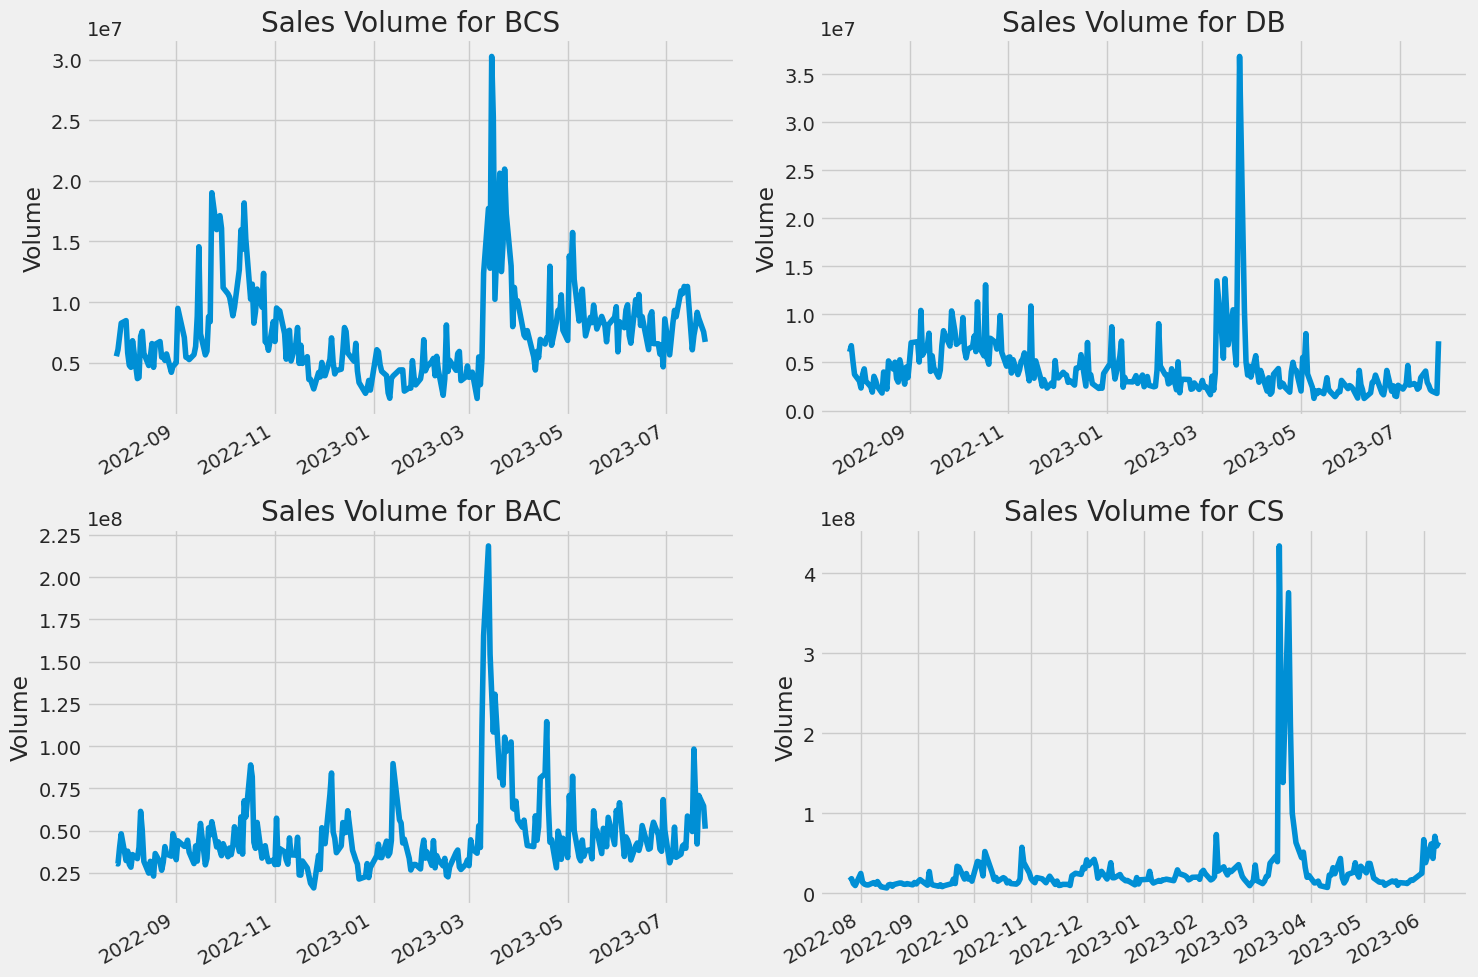

In [ ]:
#Now let's plot the total volume of stock being traded each day
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

num_subplots = len(company_list)  # Total number of subplots based on the number of companies

for i, company in enumerate(company_list):
  # The enumerate() function is used to iterate over a sequence
    plt.subplot(2, 2, i + 1)  # Increment i by 1 to avoid the ValueError
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {bank_list[i]}")  # Use i instead of i - 1 for bank_list

plt.tight_layout()
plt.show()


Now that we have seen the visualizations for the closing price and the volume traded each day, let's go for calculating the moving average fpr the stock.

**2.) What was the moving average of the various stocks?**

* The **moving average (MA)** is a simple technical analysis tool that smooths out price data by creating a constantly updated average price.

* The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

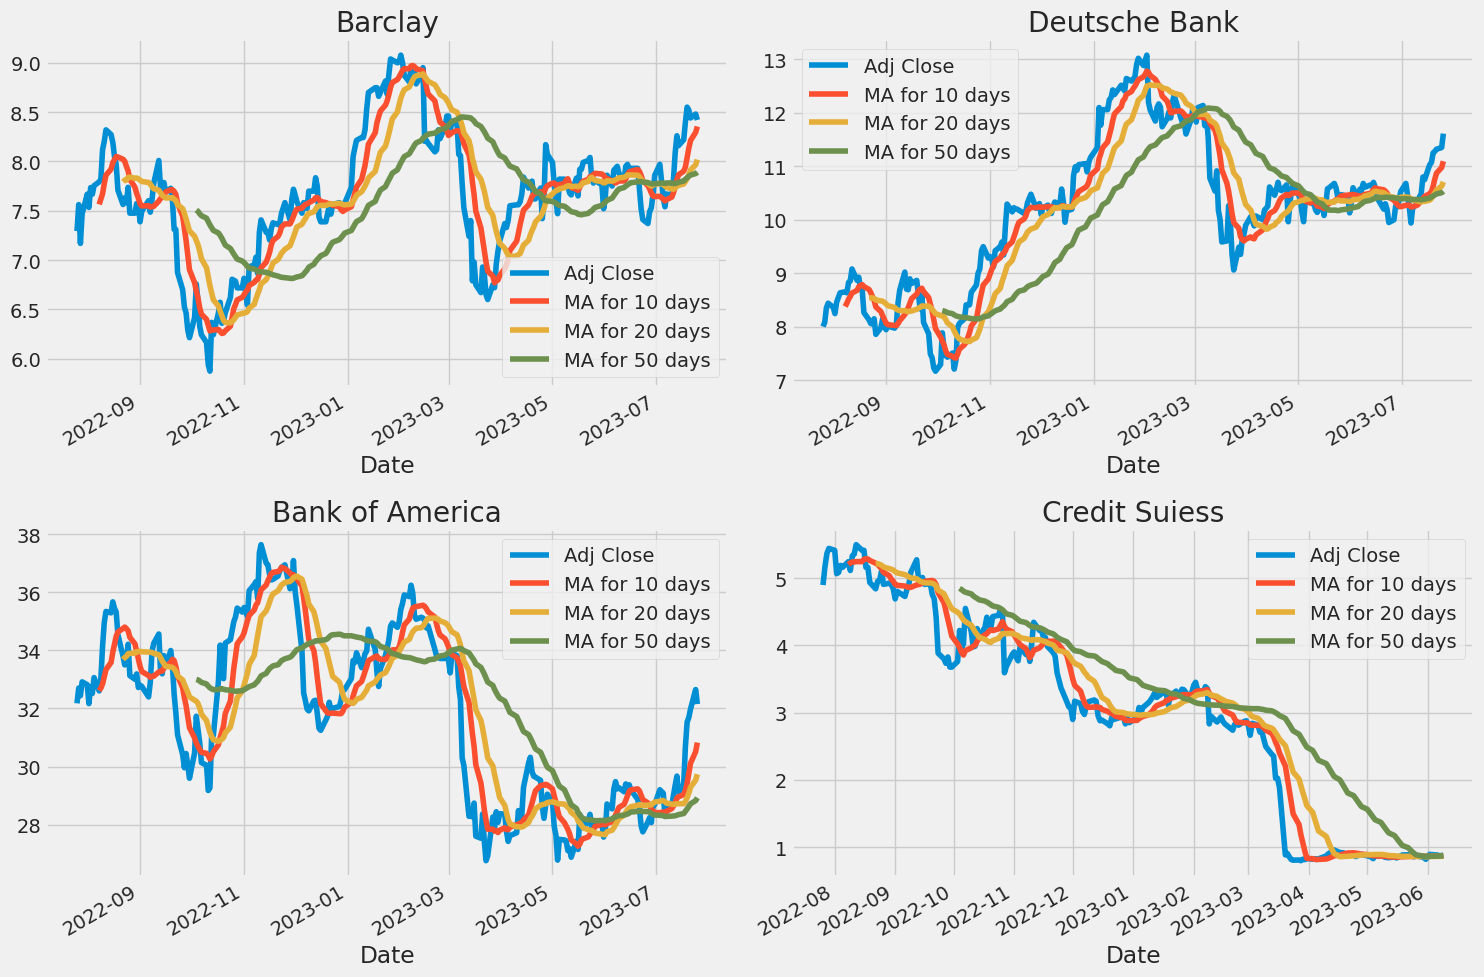

In [ ]:
ma_day = [10,20,50]

for ma in ma_day:
  for company in company_list:
    column_name = f"MA for {ma} days"
    company[column_name]  = company['Adj Close'].rolling(ma).mean()


# Create the subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot data for each company in a separate subplot
BCS[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Barclay')

DB[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Deutsche Bank')

BAC[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Bank of America')

CS[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Credit Suiess')

fig.tight_layout()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

**3.) What was the daily return of the stock on average?**

We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value.
___



In [ ]:
#We will use pct_change to find the percentage change for each day stock price of data set
for company in company_list:
  company['Daily Return'] = company['Adj Close'].pct_change()


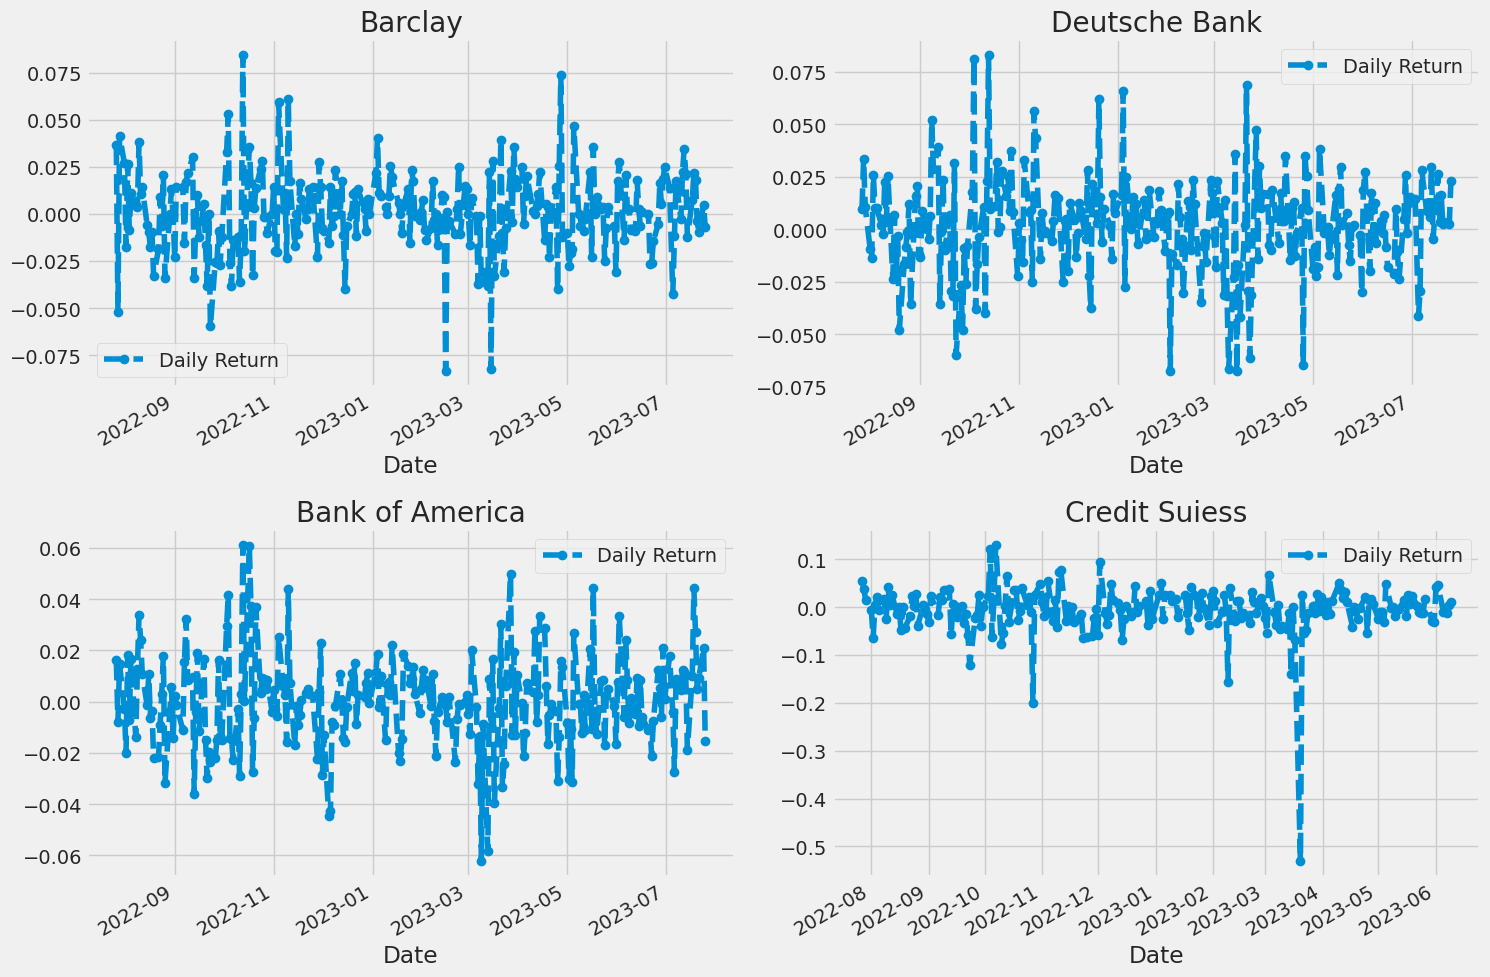

In [ ]:
#Then we will plot the daily return percentage
# Create the subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

BCS['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('Barclay')

DB['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Deutsche Bank')

BAC['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('Bank of America')

CS['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('Credit Suiess')

fig.tight_layout()

Now let's get an overall look at the **average** daily return using a histogram. We'll use **seaborn** to create a **histogram** plot.

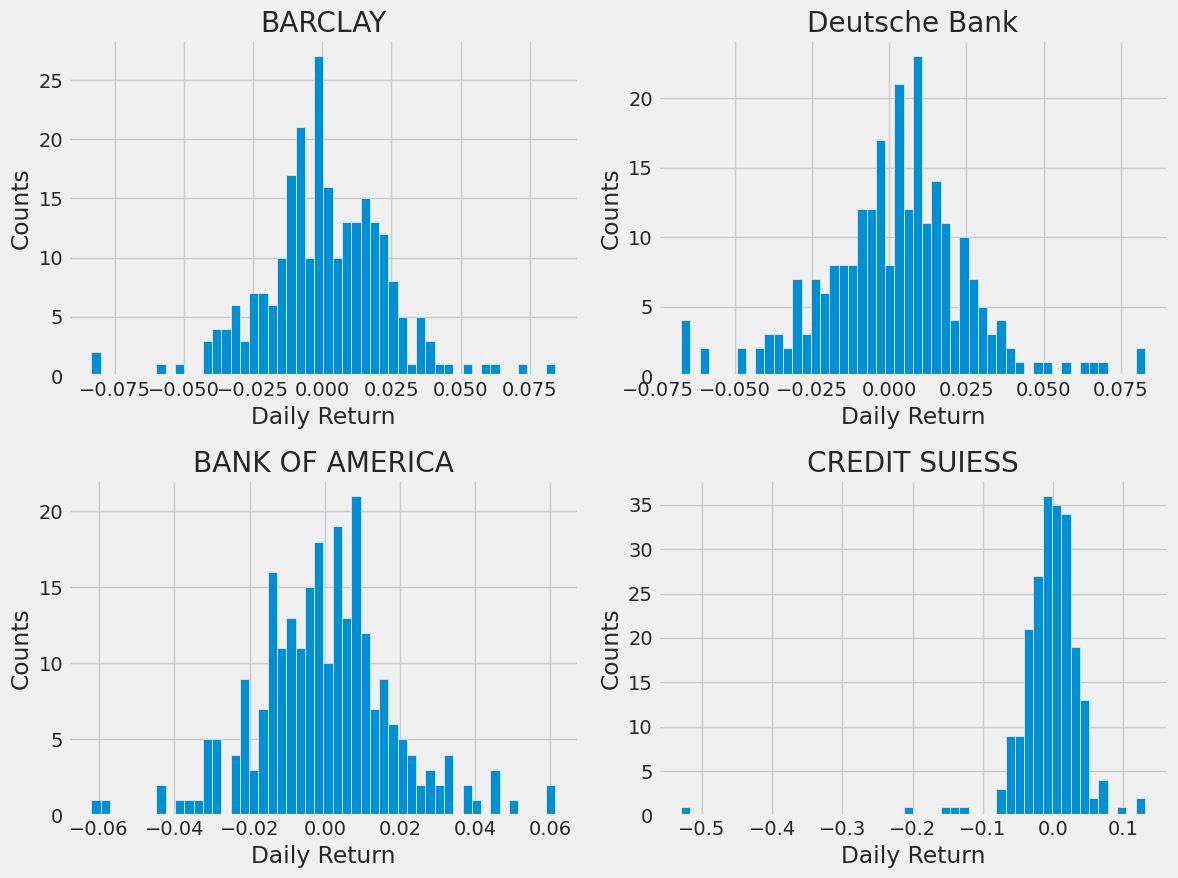

In [ ]:
#Plot histogram for the data set
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
  plt.subplot(2,2,i)
  company['Daily Return'].hist(bins=50)
  plt.xlabel('Daily Return')
  plt.ylabel('Counts')
  plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

**4.) What was the correlation between different stocks closing prices?**

* **Correlation** is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between **-1.0 and +1.0.**

* **Correlation** measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor.

Now we will analyze the returns of all the stocks with [close] column for each of the stock dataframes.

In [ ]:
#Now make a dataframe for closing price of all the bank list data set into one DataFrame
closing_df = pdr.get_data_yahoo(bank_list, start=start, end=end)['Adj Close']

#Make a new bank returns DataFrame
bank_rets = closing_df.pct_change()
bank_rets.head()

[*********************100%***********************]  4 of 4 completed


,BAC,BCS,CS,DB
Date,,,,
2022-07-26,NaN,NaN,NaN,NaN
2022-07-27,0.016339,0.036794,0.055556,0.009685
2022-07-28,-0.008038,-0.051964,0.038113,0.033573
2022-07-29,0.014706,0.041444,0.013986,0.010441
2022-08-01,-0.002958,0.026958,-0.005172,-0.009185


Now we can compare the daily percentage return of two stocks to check how correlated.

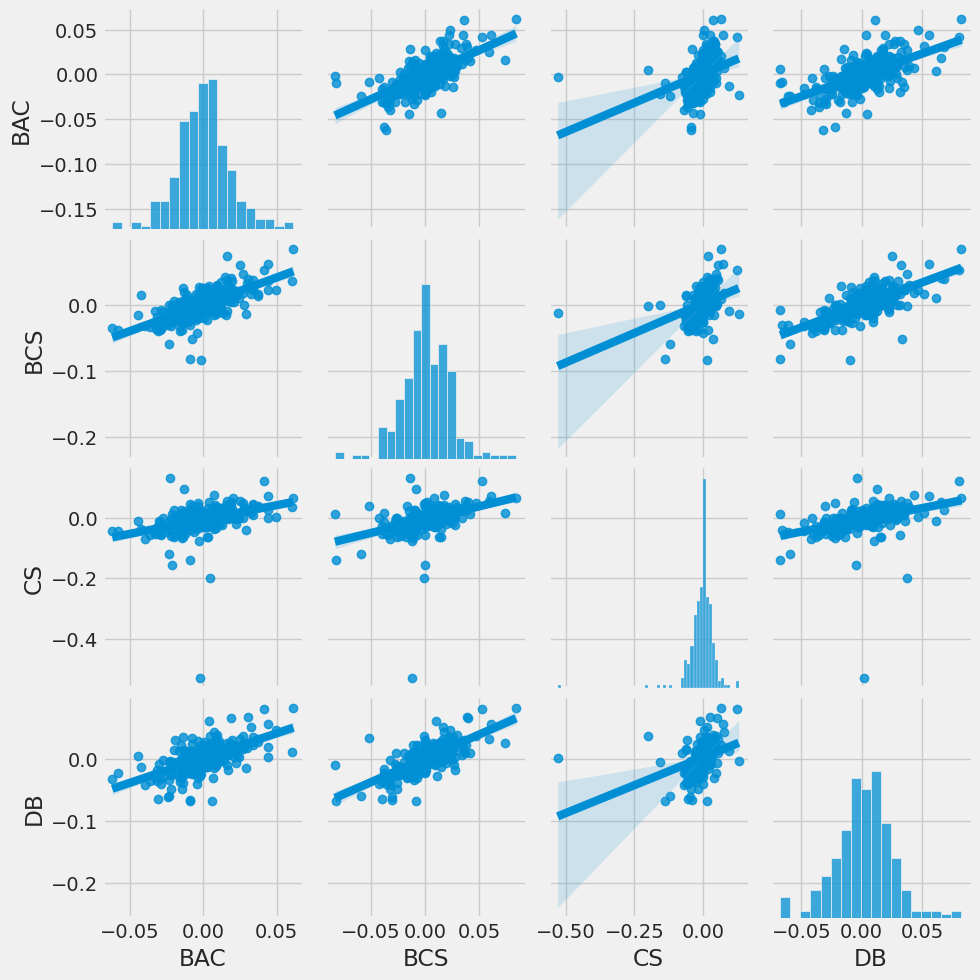

In [ ]:
#We can simply cal  pairplot on our dataframe for an automatic visual analysis of all the comparisons
sns.pairplot(bank_rets, kind='reg')

From this above plot, we are not able to clearly draw any insight. let's draw indivisual pair plot for better understanding.

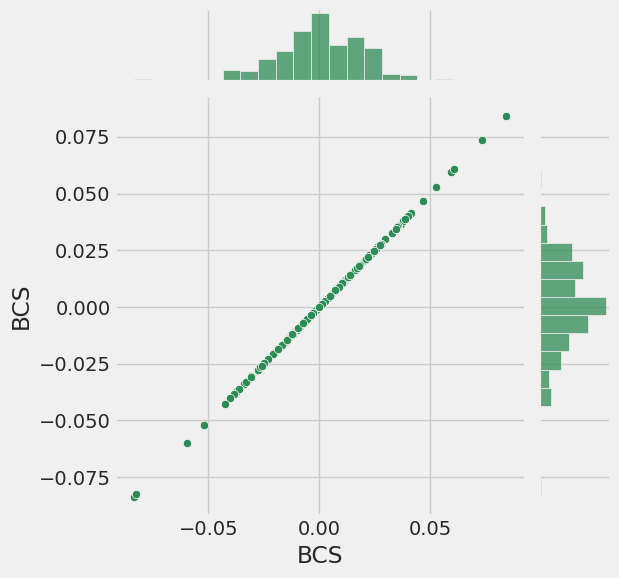

In [ ]:
#Comparing barclay to itself
sns.jointplot(x='BCS', y='BCS', data=bank_rets, kind='scatter', color='seagreen')

Graph shows a perfectly linear relationship for barclay itself.

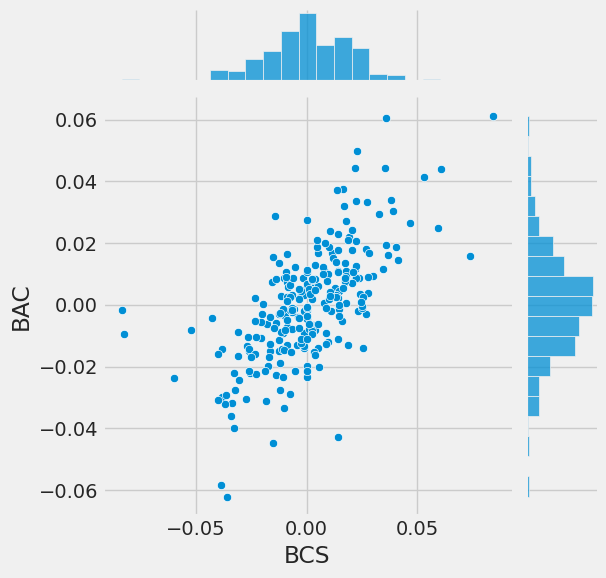

In [ ]:
# we will use joinplot to compare the daily returns of barclay and bank of america
sns.jointplot(x='BCS', y='BAC', data=bank_rets, kind='scatter')

So now we can see that between Barclay and Bank of Ameica are somehow (and positivley) correlated with each other and a linear relationship bewteen them exist.

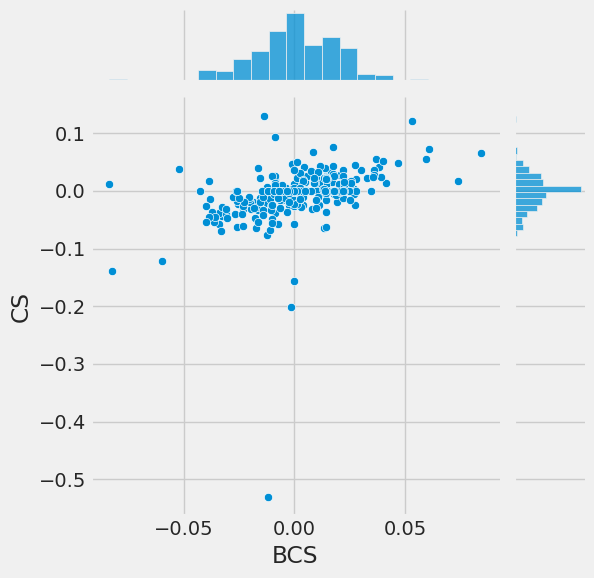

In [ ]:
# we will use joinplot to compare the daily returns of barclay and cresit suiess
sns.jointplot(x='BCS', y='CS', data=bank_rets, kind='scatter')

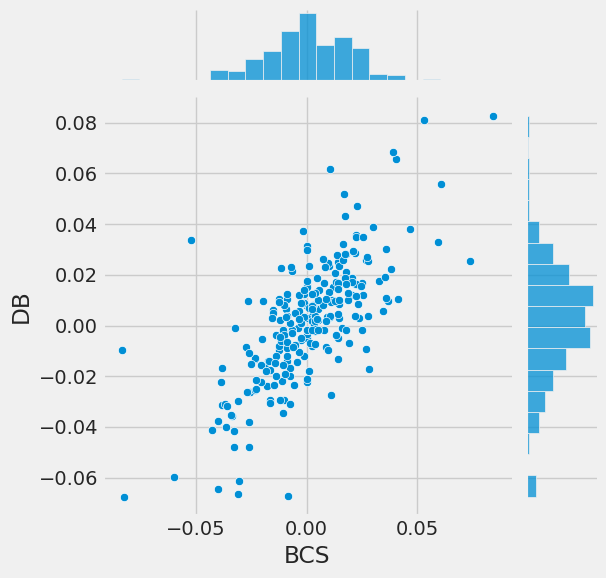

In [ ]:
# we will use joinplot to compare the daily returns of barclay and Deutsche Bank
sns.jointplot(x='BCS', y='DB', data=bank_rets, kind='scatter')

Here from the above graph, you can see there is positive correlation between the 'BCS' and 'DB' bank.

To see the actual numerical correlation values, we can draw a heat map for stock daily return values.

Text(0.5, 1.0, 'Correlation of stock closing price')

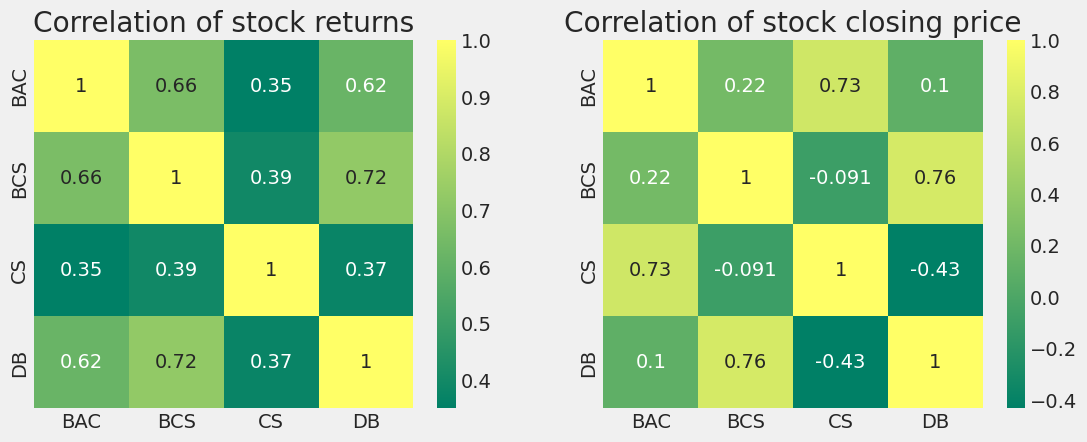

In [ ]:
#Plot a heat map for the better view of correlation between them
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.heatmap(bank_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock returns')

plt.subplot(2,2,2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

* We can see from the heat map value that in case of stock returns between **Barclay** and **Deutschy bank** is highly correlated **(0.72)** value as compare to the other stocks.

* Similarly in case of cosing stock price there is strong correlation value **(0.76)** between the **Deutschy bank** and **Barclay** as compare to other.

**5.) How much value do we put at risk by investing in a particular stock?**

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

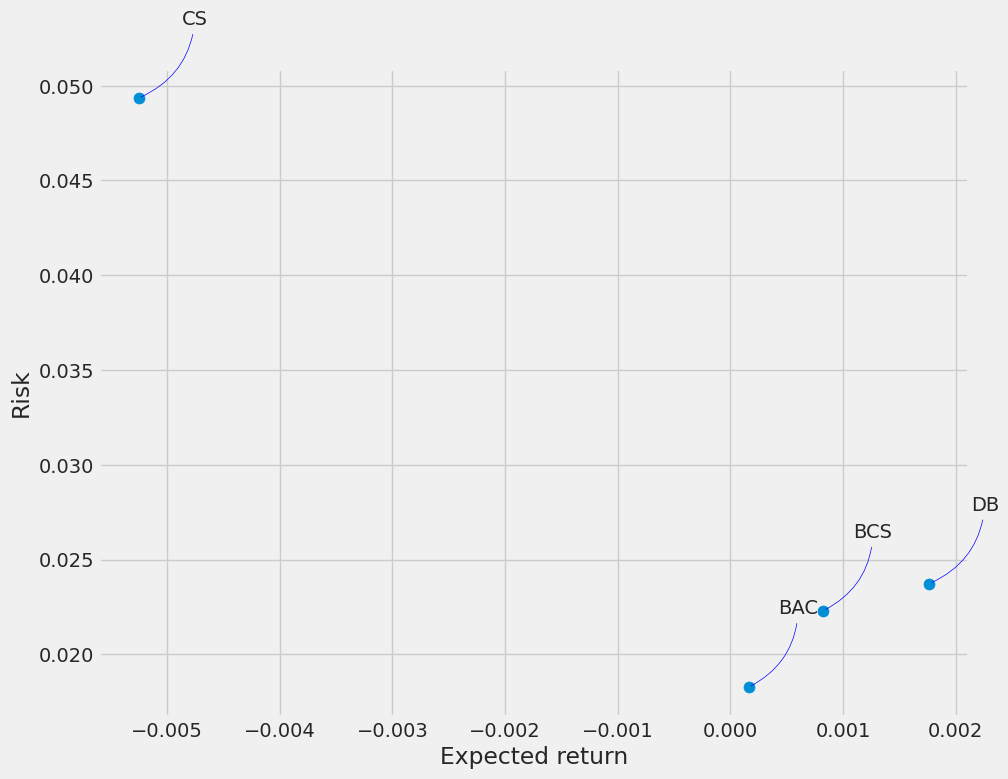

In [ ]:
rets = bank_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

From above graph plot we can see that the following results:

* **CS** = Risk--> High, Expected Return--> negative

* **BAC** = Risk--> Low, Expected Return--> Low (closed to zero)

* **BCS** = Risk--> greater than low, Expected Return--> close to 0.1%

* **DB** = Risk--> greater than low, Expected Return--> close to 0.2% better than other stocks.

**6.) Predicting the closing price stock price of Barclay:**

In [ ]:
#Get the stock data of Barclay
df = pdr.get_data_yahoo('BCS', start='2013-01-01', end=datetime.now())
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,16.543779,16.571428,16.350229,16.552996,12.260041,4149908
2013-01-03,16.377880,16.433180,16.285713,16.322580,12.089383,1675674
2013-01-04,16.322580,16.488480,16.267281,16.442396,12.178125,1505546
2013-01-07,16.958525,17.050692,16.884792,17.004608,12.594532,5690391
2013-01-08,17.152075,17.235023,16.903227,17.023041,12.608184,3987918


In [ ]:
df.shape

(2659, 6)

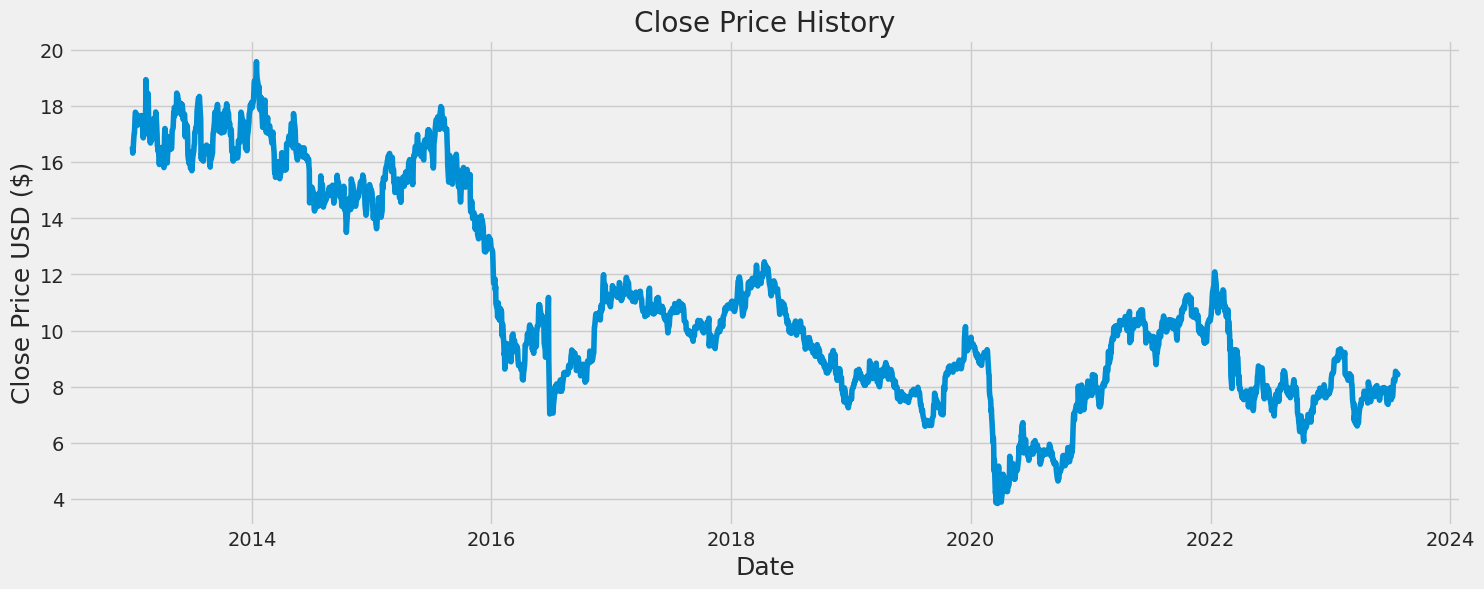

In [ ]:
#Plot the time series data set
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'close' column
data = df.filter(['Close'])

#Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model
training_data_len = int(np.ceil( len(dataset) * .95))
#np.ceil(): It ensures that the calculated training data length is always rounded up to the nearest whole number.

training_data_len

2527

In [ ]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.80768715],
       [0.79304831],
       [0.8006605 ],
       ...,
       [0.29479032],
       [0.29097841],
       [0.29542566]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
#It starts from index 60 because we need at least 60 data points to create a sequence of past data points for prediction.
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.80768715, 0.79304831, 0.8006605 , 0.83637918, 0.83755024,
       0.85218908, 0.87326892, 0.88556563, 0.88146677, 0.87268339,
       0.85570241, 0.8633146 , 0.86624227, 0.86858453, 0.8586302 ,
       0.86097234, 0.87444011, 0.87795332, 0.86565686, 0.87034125,
       0.87795332, 0.861558  , 0.82759592, 0.84047804, 0.84106357,
       0.83403704, 0.85980127, 0.8586302 , 0.95934512, 0.93885081,
       0.92011311, 0.91894205, 0.9277253 , 0.88205218, 0.85277462,
       0.85804455, 0.81822701, 0.81588487, 0.83813578, 0.84223464,
       0.8211548 , 0.82701039, 0.83520811, 0.83345138, 0.85745914,
       0.87151232, 0.85570241, 0.84867576, 0.85687348, 0.88615104,
       0.88205218, 0.83637918, 0.81002941, 0.80710162, 0.79773271,
       0.80534489, 0.76728408, 0.77958066, 0.78016619, 0.7959761 ])]
[0.784265055417551]

[array([0.80768715, 0.79304831, 0.8006605 , 0.83637918, 0.83755024,
       0.85218908, 0.87326892, 0.88556563, 0.88146677, 0.87268339,
       0.85570241, 0.8633146 , 0.8662

In [ ]:
#Now make LSTM model
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
# Build the  LSTM (Long Short-Term Memory) model
#The LSTM model is a type of recurrent neural network (RNN) that is well-suited for sequence data, such as time series data.
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2467/2467 [==============================] - 111s 43ms/step - loss: 0.0017


In [ ]:
#Creating the testing data set

test_data = scaled_data[training_data_len - 60:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

#Convert the data to numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))



In [ ]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squarred error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

rmse

5/5 [==============================] - 3s 93ms/step


0.22191387983666194

<ipython-input-32-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


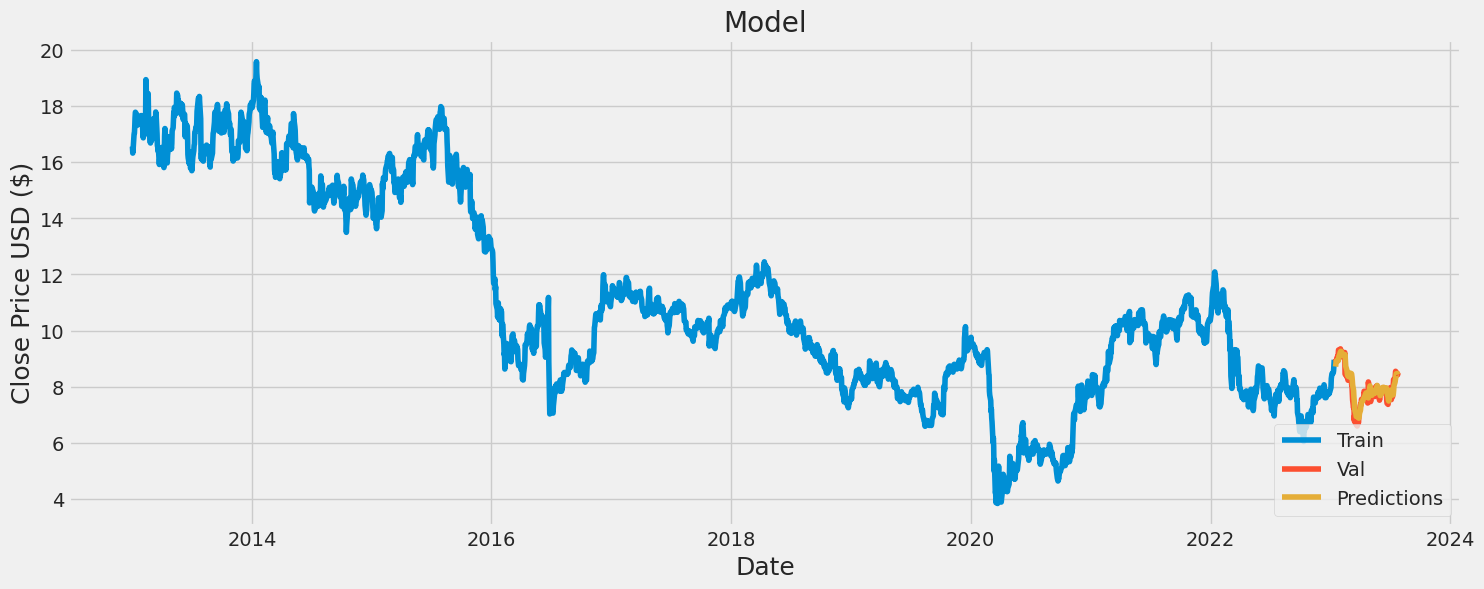

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-01-17,9.01,8.716512
2023-01-18,9.01,8.831653
2023-01-19,8.92,8.908154
2023-01-20,8.96,8.918681
2023-01-23,9.08,8.912344
...,...,...
2023-07-20,8.52,8.394769
2023-07-21,8.44,8.461150
2023-07-24,8.48,8.468823


References:

* https://www.machinelearningplus.com/time-series/time-series-analysis-python/

* https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

* https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm

* https://www.kaggle.com/code/pierpaolo28/stock-market-analysis-and-time-series-prediction
